In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("/content/autism_screening.csv")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
df.shape

(704, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [5]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df["ethnicity"].value_counts()

White-European     233
Asian              123
?                   93
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [8]:
df["ethnicity"] = df["ethnicity"].str.replace("others", "Others")
df["ethnicity"] = df["ethnicity"].str.replace("?", "Others")

<ipython-input-8-19c65e8252ac>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["ethnicity"] = df["ethnicity"].str.replace("?", "Others")


In [9]:
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})
df["used_app_before"] = df["used_app_before"].map({"no": 0, "yes": 1})
df["gender"] = df["gender"].map({"f": 0, "m": 1})

In [10]:
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})

In [11]:
df["relation"] = df["relation"].str.replace("?", "Others")

<ipython-input-11-f7efd01c746b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["relation"] = df["relation"].str.replace("?", "Others")


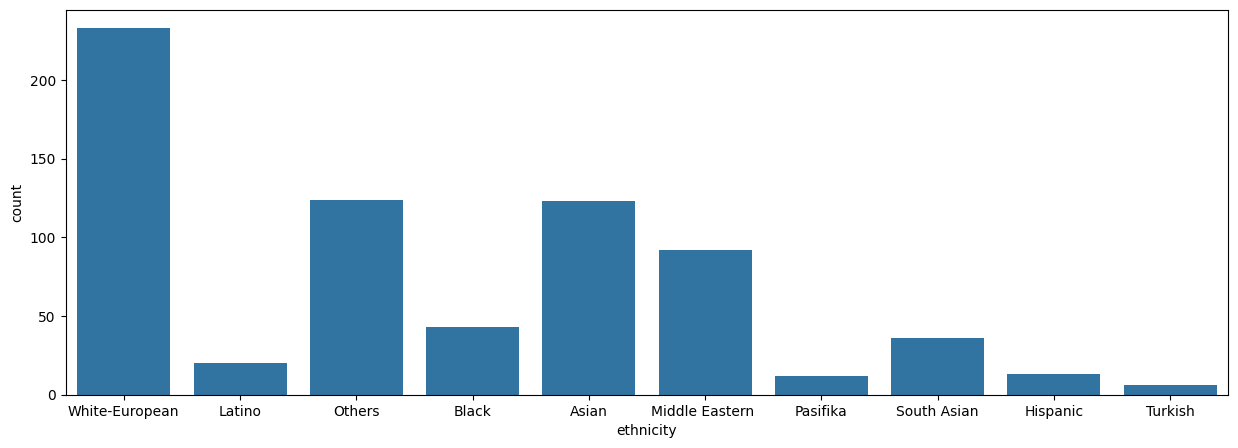

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.countplot(x=df["ethnicity"])
plt.show()

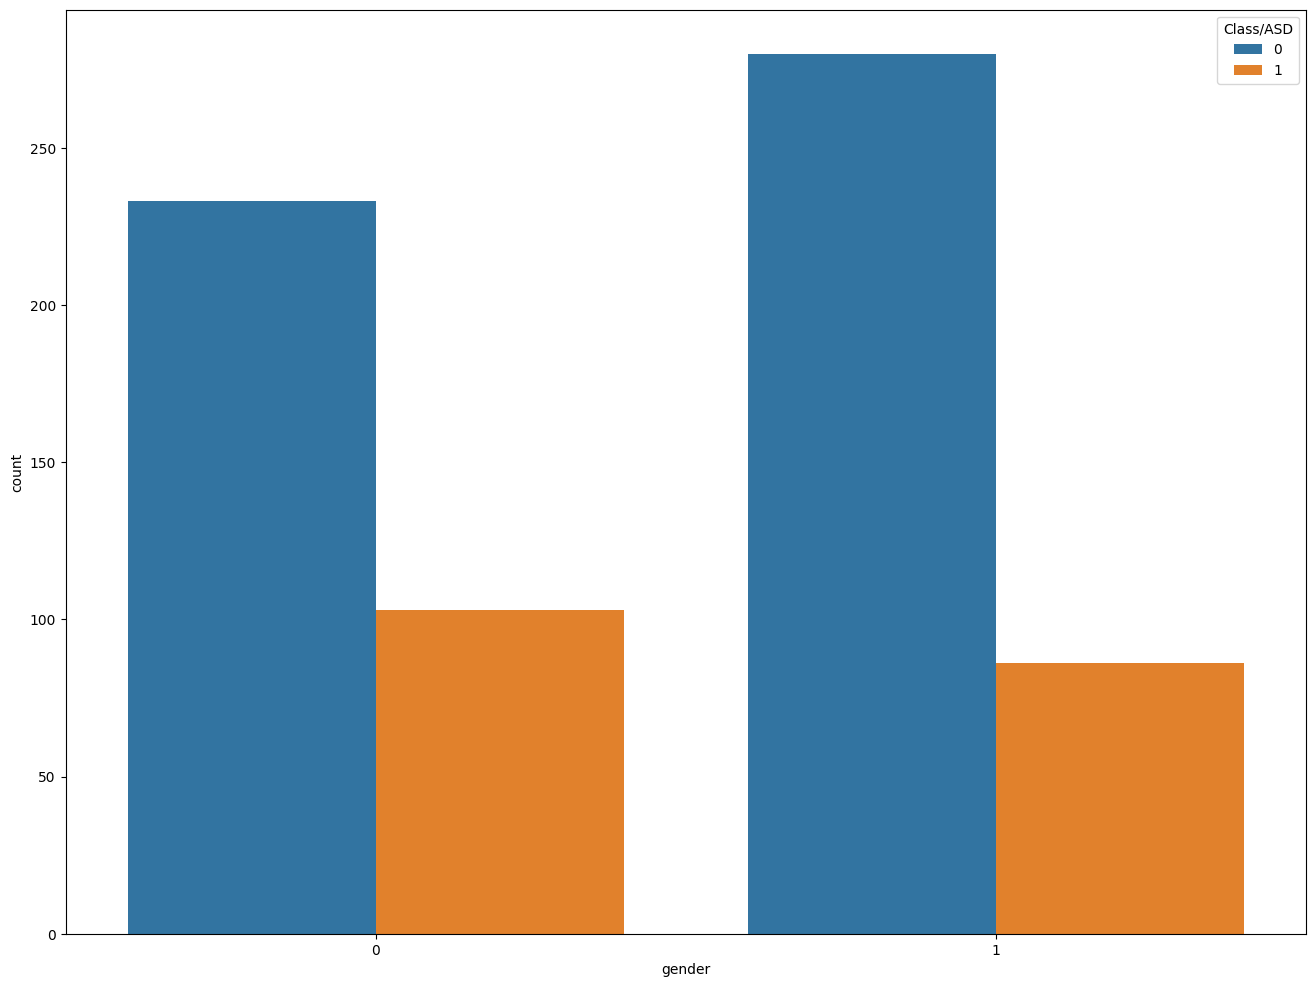

In [13]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df["gender"], hue=df["Class/ASD"])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [15]:
df["ethnicity"] = label_encoder(df["ethnicity"])

ethnicity ['Asian' 'Black' 'Hispanic' 'Latino' 'Middle Eastern ' 'Others' 'Pasifika'
 'South Asian' 'Turkish' 'White-European']


In [16]:
df["relation"] = label_encoder(df["relation"])

relation ['Health care professional' 'Others' 'Parent' 'Relative' 'Self']


In [17]:
ndf = df.drop(["contry_of_res", "age_desc"], axis=1)

In [18]:
ndf["age"] = ndf["age"].astype("int64")
ndf["result"] = ndf["result"].astype("int64")

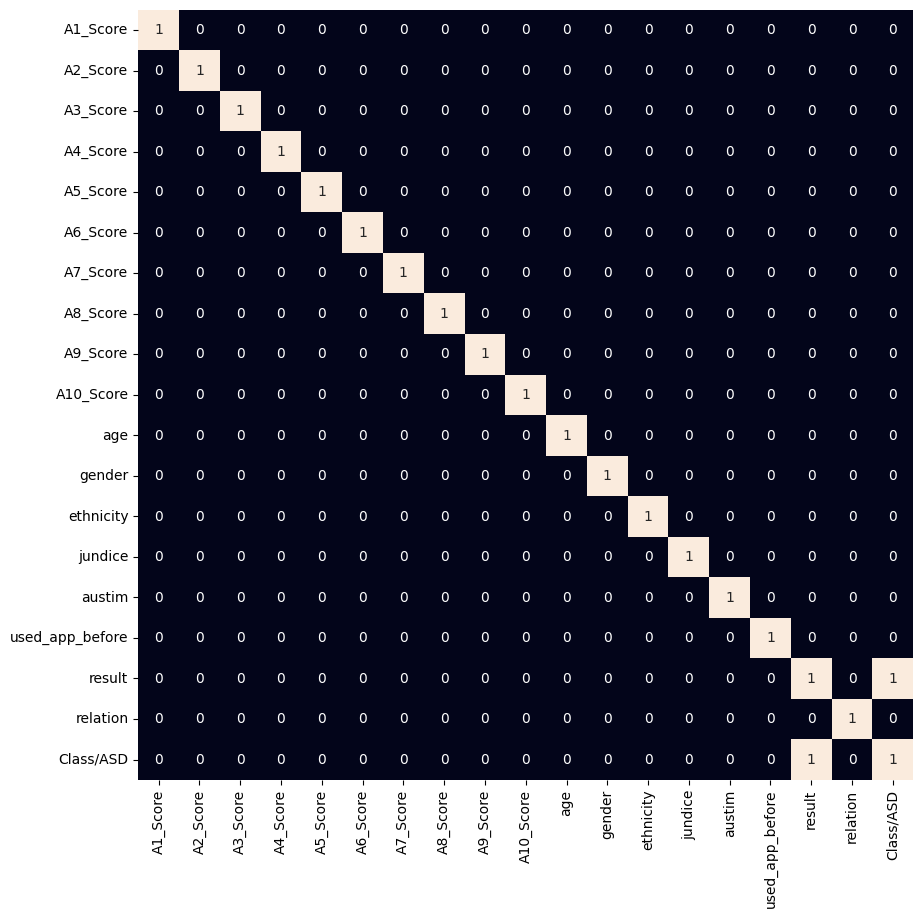

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(ndf.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [20]:
X = ndf.drop(["Class/ASD"], axis=1)
y = ndf["Class/ASD"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
r2_score(y_test, y_pred_logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_score(y_test, y_pred_xgb)

1.0

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
r2_score(y_test, y_pred_svc)

0.6654010441385856

In [25]:
test = np.array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 32, 1, 9, 0, 0, 0, 6, 4]])
logreg.predict(test), xgb.predict(test), svc.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


(array([0]), array([0]), array([0]))